In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [108]:
df = pd.read_csv('sales.csv', encoding= 'ISO-8859-1')

In [109]:
df.head()

,Unnamed: 0,event_id,primary_act_id,secondary_act_id,purch_party_lkup_id,event_name,primary_act_name,secondary_act_name,major_cat_name,minor_cat_name,...,edu_1st_indv_val,edu_2nd_indv_val,adults_in_hh_num,married_ind,child_present_ind,home_owner_ind,occpn_val,occpn_1st_val,occpn_2nd_val,dist_to_ven
0,1,abcaf1adb99a935fc661,43f0436b905bfa7c2eec,b85143bf51323b72e53c,7dfa56dd7d5956b17587,Xfinity Center Mansfield Premier Parking: Flor...,XFINITY Center Mansfield Premier Parking,NaN,MISC,PARKING,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,6c56d7f08c95f2aa453c,1a3e9aecd0617706a794,f53529c5679ea6ca5a48,4f9e6fc637eaf7b736c2,Gorge Camping - dave matthews band - sept 3-7,Gorge Camping,Dave Matthews Band,MISC,CAMPING,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0
2,3,c7ab4524a121f9d687d2,4b677c3f5bec71eec8d1,b85143bf51323b72e53c,6c2545703bd527a7144d,Dodge Theatre Adams Street Parking - benise,Parking Event,NaN,MISC,PARKING,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,394cb493f893be9b9ed1,b1ccea01ad6ef8522796,b85143bf51323b72e53c,527d6b1eaffc69ddd882,Gexa Energy Pavilion Vip Parking : kid rock wi...,Gexa Energy Pavilion VIP Parking,NaN,MISC,PARKING,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,55b5f67e618557929f48,91c03a34b562436efa3c,b85143bf51323b72e53c,8bd62c394a35213bdf52,Premier Parking - motley crue,White River Amphitheatre Premier Parking,NaN,MISC,PARKING,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
df.shape

(5000, 46)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 46 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              5000 non-null   int64  
 1   event_id                5000 non-null   object 
 2   primary_act_id          5000 non-null   object 
 3   secondary_act_id        5000 non-null   object 
 4   purch_party_lkup_id     5000 non-null   object 
 5   event_name              5000 non-null   object 
 6   primary_act_name        5000 non-null   object 
 7   secondary_act_name      1586 non-null   object 
 8   major_cat_name          5000 non-null   object 
 9   minor_cat_name          5000 non-null   object 
 10  la_event_type_cat       5000 non-null   object 
 11  event_disp_name         5000 non-null   object 
 12  ticket_text             5000 non-null   object 
 13  tickets_purchased_qty   5000 non-null   int64  
 14  trans_face_val_amt      5000 non-null   

In [112]:
#show some colunms have many Nan data 
df.isna().sum()

Unnamed: 0                   0
event_id                     0
primary_act_id               0
secondary_act_id             0
purch_party_lkup_id          0
event_name                   0
primary_act_name             0
secondary_act_name        3414
major_cat_name               0
minor_cat_name               0
la_event_type_cat            0
event_disp_name              0
ticket_text                  0
tickets_purchased_qty        0
trans_face_val_amt           0
delivery_type_cd             0
event_date_time              0
event_dt                     0
presale_dt                2892
onsale_dt                  101
sales_ord_create_dttm        4
sales_ord_tran_dt            0
print_dt                   424
timezn_nm                    0
venue_city                   0
venue_state                  0
venue_postal_cd_sgmt_1       0
sales_platform_cd         2422
print_flg                    0
la_valid_tkt_event_flg       0
fin_mkt_nm                   0
web_session_cookie_val       0
gndr_cd 

In [113]:
cols=[]
for c in df.columns:
    cols.append(c)

In [114]:
#columns drop
df.drop(cols[32:],axis=1, inplace=True)

In [115]:
df.drop(['secondary_act_name','trans_face_val_amt','sales_platform_cd','presale_dt'],axis=1, inplace=True)

In [116]:
#handle nan value in print_dt and onsale_dt
df['print_dt'].fillna(df['print_dt'].mode(), inplace = True)
df['onsale_dt'].fillna(df['onsale_dt'].mode(),inplace=True)

In [117]:
#show sales_ord_tran_dt need to clean solit it to sales_day -sale_ moth -sales_year
#show print_dt need to clean
df.head()

,Unnamed: 0,event_id,primary_act_id,secondary_act_id,purch_party_lkup_id,event_name,primary_act_name,major_cat_name,minor_cat_name,la_event_type_cat,...,sales_ord_tran_dt,print_dt,timezn_nm,venue_city,venue_state,venue_postal_cd_sgmt_1,print_flg,la_valid_tkt_event_flg,fin_mkt_nm,web_session_cookie_val
0,1,abcaf1adb99a935fc661,43f0436b905bfa7c2eec,b85143bf51323b72e53c,7dfa56dd7d5956b17587,Xfinity Center Mansfield Premier Parking: Flor...,XFINITY Center Mansfield Premier Parking,MISC,PARKING,PARKING,...,2015-09-11,2015-09-12,EST,MANSFIELD,MASSACHUSETTS,02048,T,N,Boston,7dfa56dd7d5956b17587
1,2,6c56d7f08c95f2aa453c,1a3e9aecd0617706a794,f53529c5679ea6ca5a48,4f9e6fc637eaf7b736c2,Gorge Camping - dave matthews band - sept 3-7,Gorge Camping,MISC,CAMPING,INVALID,...,2009-07-05,2009-09-01,PST,QUINCY,WASHINGTON,98848,T,N,Seattle,4f9e6fc637eaf7b736c2
2,3,c7ab4524a121f9d687d2,4b677c3f5bec71eec8d1,b85143bf51323b72e53c,6c2545703bd527a7144d,Dodge Theatre Adams Street Parking - benise,Parking Event,MISC,PARKING,PARKING,...,2006-04-05,2006-04-05,MST,PHOENIX,ARIZONA,85003,T,N,Arizona,6c2545703bd527a7144d
3,4,394cb493f893be9b9ed1,b1ccea01ad6ef8522796,b85143bf51323b72e53c,527d6b1eaffc69ddd882,Gexa Energy Pavilion Vip Parking : kid rock wi...,Gexa Energy Pavilion VIP Parking,MISC,PARKING,PARKING,...,2011-07-01,2011-07-06,CST,DALLAS,TEXAS,75210,T,N,Dallas,527d6b1eaffc69ddd882
4,5,55b5f67e618557929f48,91c03a34b562436efa3c,b85143bf51323b72e53c,8bd62c394a35213bdf52,Premier Parking - motley crue,White River Amphitheatre Premier Parking,MISC,PARKING,PARKING,...,2005-06-18,2005-06-28,PST,AUBURN,WASHINGTON,98092,T,N,Seattle,8bd62c394a35213bdf52


In [118]:
#split sales_ord_tran_dt to three cpl
df[['Year_sales' , 'Month_sales','Day_sales']]=df.sales_ord_tran_dt.str.split('-', expand = True)

In [119]:
#split onsale_dt  to three cpl
df[['Year_onsale' , 'Month_onsale','Day_onsale']]=df.onsale_dt.str.split('-', expand = True)


In [120]:
#split sales_ord_create_dttm  to three cpl
df[['Year_create_dttm' , 'Month_create_dttm','Day_create_dttm']]=df.sales_ord_create_dttm.str.split('-', expand = True)

In [121]:
df[['Day_create_dttm' , 'time_create_dttm']]=df.Day_create_dttm.str.split(' ', expand = True)

In [122]:
lst1=['Year_sales' , 'Month_sales','Day_sales','Year_onsale' , 'Month_onsale','Day_onsale','Year_create_dttm' , 'Month_create_dttm','Day_create_dttm']

In [123]:
for x in lst1:
    df[x]= df[x].astype(float)

In [124]:
#Now drop sales_ord_tran_dt and  print_dt
df.drop(['sales_ord_tran_dt','onsale_dt' ,'sales_ord_create_dttm'],axis=1 , inplace=True)

In [125]:
df.head()


,Unnamed: 0,event_id,primary_act_id,secondary_act_id,purch_party_lkup_id,event_name,primary_act_name,major_cat_name,minor_cat_name,la_event_type_cat,...,Year_sales,Month_sales,Day_sales,Year_onsale,Month_onsale,Day_onsale,Year_create_dttm,Month_create_dttm,Day_create_dttm,time_create_dttm
0,1,abcaf1adb99a935fc661,43f0436b905bfa7c2eec,b85143bf51323b72e53c,7dfa56dd7d5956b17587,Xfinity Center Mansfield Premier Parking: Flor...,XFINITY Center Mansfield Premier Parking,MISC,PARKING,PARKING,...,2015.0,9.0,11.0,2015.0,5.0,15.0,2015.0,9.0,11.0,18:17:45
1,2,6c56d7f08c95f2aa453c,1a3e9aecd0617706a794,f53529c5679ea6ca5a48,4f9e6fc637eaf7b736c2,Gorge Camping - dave matthews band - sept 3-7,Gorge Camping,MISC,CAMPING,INVALID,...,2009.0,7.0,5.0,2009.0,3.0,13.0,2009.0,7.0,6.0,00:00:00
2,3,c7ab4524a121f9d687d2,4b677c3f5bec71eec8d1,b85143bf51323b72e53c,6c2545703bd527a7144d,Dodge Theatre Adams Street Parking - benise,Parking Event,MISC,PARKING,PARKING,...,2006.0,4.0,5.0,2006.0,2.0,25.0,2006.0,4.0,5.0,00:00:00
3,4,394cb493f893be9b9ed1,b1ccea01ad6ef8522796,b85143bf51323b72e53c,527d6b1eaffc69ddd882,Gexa Energy Pavilion Vip Parking : kid rock wi...,Gexa Energy Pavilion VIP Parking,MISC,PARKING,PARKING,...,2011.0,7.0,1.0,2011.0,4.0,22.0,2011.0,7.0,1.0,17:38:50
4,5,55b5f67e618557929f48,91c03a34b562436efa3c,b85143bf51323b72e53c,8bd62c394a35213bdf52,Premier Parking - motley crue,White River Amphitheatre Premier Parking,MISC,PARKING,PARKING,...,2005.0,6.0,18.0,2005.0,3.0,4.0,2005.0,6.0,18.0,00:00:00


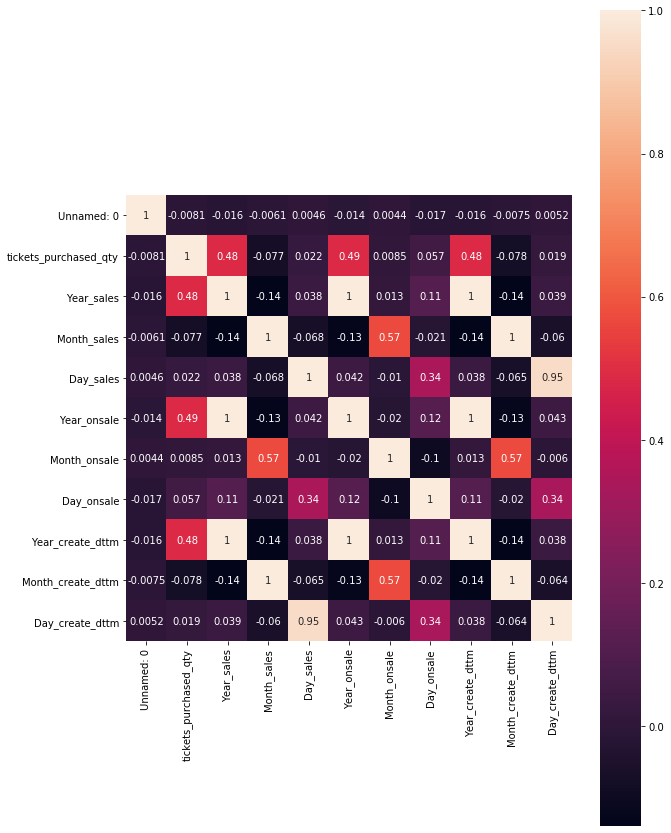

In [126]:
import seaborn as sns
plt.figure(figsize=(10,15))
sns.heatmap(df.corr(),annot=True , square=True)

In [127]:
df.drop(['Year_onsale','Year_sales' ,'Day_sales','Month_sales'],axis=1 , inplace=True)

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              5000 non-null   int64  
 1   event_id                5000 non-null   object 
 2   primary_act_id          5000 non-null   object 
 3   secondary_act_id        5000 non-null   object 
 4   purch_party_lkup_id     5000 non-null   object 
 5   event_name              5000 non-null   object 
 6   primary_act_name        5000 non-null   object 
 7   major_cat_name          5000 non-null   object 
 8   minor_cat_name          5000 non-null   object 
 9   la_event_type_cat       5000 non-null   object 
 10  event_disp_name         5000 non-null   object 
 11  ticket_text             5000 non-null   object 
 12  tickets_purchased_qty   5000 non-null   int64  
 13  delivery_type_cd        5000 non-null   object 
 14  event_date_time         5000 non-null   

In [129]:
#split event_date_time to three cpl
df[['Year_event_date_time' , 'Month_event_date_time','Day_event_date_time']]=df.event_date_time.str.split('-', expand = True)

In [130]:
#split Day_event_date_time to two cpl
df[['Day_event_date_time','event_time']]=df.Day_event_date_time.str.split(' ',expand=True)

In [131]:
#split event_dt
df[['Year_event_dt' , 'Month_event_dt','Day_event_dt']]=df.event_dt.str.split('-', expand = True)

In [132]:
#split print_dt
df[['Year_print_dt','Month_print_dt','Day_print_dt']]=df.print_dt.str.split('-', expand = True)

In [133]:
df.drop(['event_dt','print_dt','event_date_time'],axis=1 ,inplace=True)

In [134]:
lst2=['Year_event_date_time' , 'Month_event_date_time','Day_event_date_time','Year_event_dt' , 'Month_event_dt','Day_event_dt','Year_print_dt','Month_print_dt','Day_print_dt']
for x in lst2:
    df[x]= df[x].astype(float)

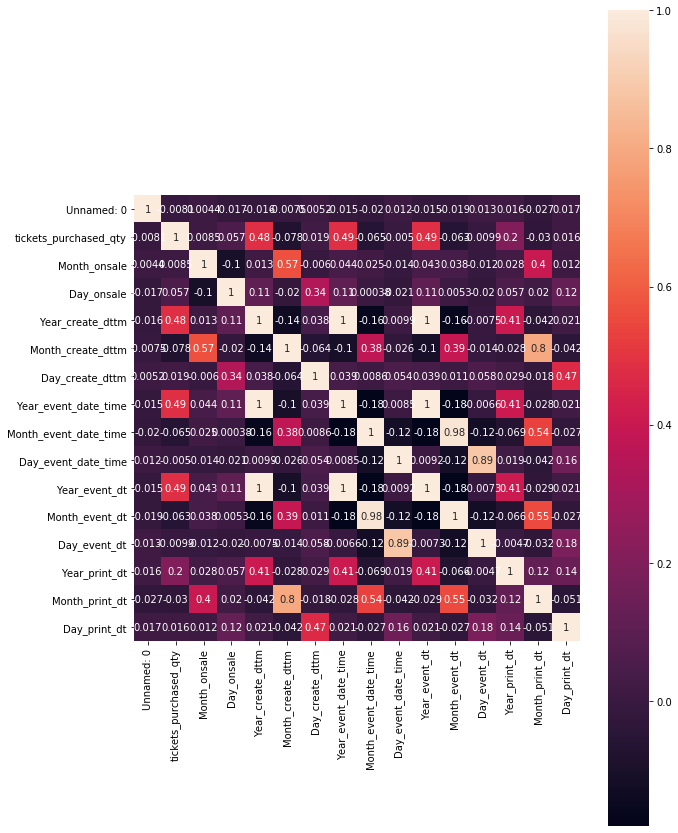

In [135]:
plt.figure(figsize=(10,15))
sns.heatmap(df.corr(),annot=True , square=True)

In [136]:
#depend on Year_create_dttm
df.drop(['Year_event_date_time','Year_event_dt']axis=1 ,inplace=True)

SyntaxError: invalid syntax (<ipython-input-136-95be074d6e64>, line 2)

In [137]:
#depend on Month_event_date_tim
df.drop(['Month_print_dt'] ,axis=1 , inplace=True)

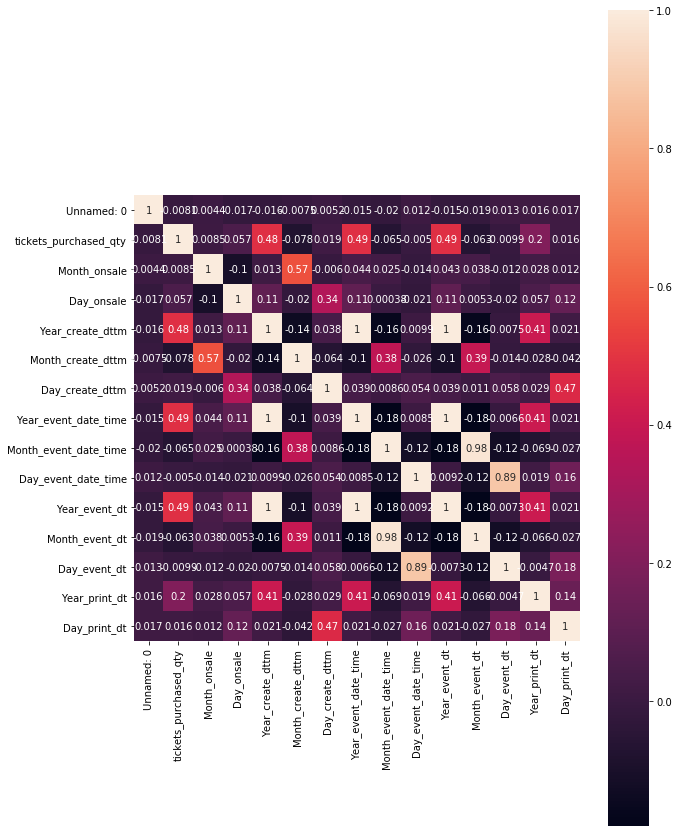

In [138]:
plt.figure(figsize=(10,15))
sns.heatmap(df.corr(),annot=True , square=True)

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              5000 non-null   int64  
 1   event_id                5000 non-null   object 
 2   primary_act_id          5000 non-null   object 
 3   secondary_act_id        5000 non-null   object 
 4   purch_party_lkup_id     5000 non-null   object 
 5   event_name              5000 non-null   object 
 6   primary_act_name        5000 non-null   object 
 7   major_cat_name          5000 non-null   object 
 8   minor_cat_name          5000 non-null   object 
 9   la_event_type_cat       5000 non-null   object 
 10  event_disp_name         5000 non-null   object 
 11  ticket_text             5000 non-null   object 
 12  tickets_purchased_qty   5000 non-null   int64  
 13  delivery_type_cd        5000 non-null   object 
 14  timezn_nm               5000 non-null   

In [140]:
df.head()

,Unnamed: 0,event_id,primary_act_id,secondary_act_id,purch_party_lkup_id,event_name,primary_act_name,major_cat_name,minor_cat_name,la_event_type_cat,...,time_create_dttm,Year_event_date_time,Month_event_date_time,Day_event_date_time,event_time,Year_event_dt,Month_event_dt,Day_event_dt,Year_print_dt,Day_print_dt
0,1,abcaf1adb99a935fc661,43f0436b905bfa7c2eec,b85143bf51323b72e53c,7dfa56dd7d5956b17587,Xfinity Center Mansfield Premier Parking: Flor...,XFINITY Center Mansfield Premier Parking,MISC,PARKING,PARKING,...,18:17:45,2015.0,9.0,12.0,23:30:00,2015.0,9.0,12.0,2015.0,12.0
1,2,6c56d7f08c95f2aa453c,1a3e9aecd0617706a794,f53529c5679ea6ca5a48,4f9e6fc637eaf7b736c2,Gorge Camping - dave matthews band - sept 3-7,Gorge Camping,MISC,CAMPING,INVALID,...,00:00:00,2009.0,9.0,5.0,01:00:00,2009.0,9.0,4.0,2009.0,1.0
2,3,c7ab4524a121f9d687d2,4b677c3f5bec71eec8d1,b85143bf51323b72e53c,6c2545703bd527a7144d,Dodge Theatre Adams Street Parking - benise,Parking Event,MISC,PARKING,PARKING,...,00:00:00,2006.0,4.0,22.0,01:30:00,2006.0,4.0,21.0,2006.0,5.0
3,4,394cb493f893be9b9ed1,b1ccea01ad6ef8522796,b85143bf51323b72e53c,527d6b1eaffc69ddd882,Gexa Energy Pavilion Vip Parking : kid rock wi...,Gexa Energy Pavilion VIP Parking,MISC,PARKING,PARKING,...,17:38:50,2011.0,9.0,3.0,00:00:00,2011.0,9.0,2.0,2011.0,6.0
4,5,55b5f67e618557929f48,91c03a34b562436efa3c,b85143bf51323b72e53c,8bd62c394a35213bdf52,Premier Parking - motley crue,White River Amphitheatre Premier Parking,MISC,PARKING,PARKING,...,00:00:00,2005.0,7.0,31.0,01:00:00,2005.0,7.0,30.0,2005.0,28.0


In [141]:
df.drop(['Unnamed: 0'] ,axis=1 ,inplace=True)

In [142]:
df.head()

,event_id,primary_act_id,secondary_act_id,purch_party_lkup_id,event_name,primary_act_name,major_cat_name,minor_cat_name,la_event_type_cat,event_disp_name,...,time_create_dttm,Year_event_date_time,Month_event_date_time,Day_event_date_time,event_time,Year_event_dt,Month_event_dt,Day_event_dt,Year_print_dt,Day_print_dt
0,abcaf1adb99a935fc661,43f0436b905bfa7c2eec,b85143bf51323b72e53c,7dfa56dd7d5956b17587,Xfinity Center Mansfield Premier Parking: Flor...,XFINITY Center Mansfield Premier Parking,MISC,PARKING,PARKING,Xfinity Center Mansfield Premier Parking: Flor...,...,18:17:45,2015.0,9.0,12.0,23:30:00,2015.0,9.0,12.0,2015.0,12.0
1,6c56d7f08c95f2aa453c,1a3e9aecd0617706a794,f53529c5679ea6ca5a48,4f9e6fc637eaf7b736c2,Gorge Camping - dave matthews band - sept 3-7,Gorge Camping,MISC,CAMPING,INVALID,Gorge Camping - dave matthews band - sept 3-7,...,00:00:00,2009.0,9.0,5.0,01:00:00,2009.0,9.0,4.0,2009.0,1.0
2,c7ab4524a121f9d687d2,4b677c3f5bec71eec8d1,b85143bf51323b72e53c,6c2545703bd527a7144d,Dodge Theatre Adams Street Parking - benise,Parking Event,MISC,PARKING,PARKING,Dodge Theatre Adams Street Parking - benise,...,00:00:00,2006.0,4.0,22.0,01:30:00,2006.0,4.0,21.0,2006.0,5.0
3,394cb493f893be9b9ed1,b1ccea01ad6ef8522796,b85143bf51323b72e53c,527d6b1eaffc69ddd882,Gexa Energy Pavilion Vip Parking : kid rock wi...,Gexa Energy Pavilion VIP Parking,MISC,PARKING,PARKING,Gexa Energy Pavilion Vip Parking : kid rock wi...,...,17:38:50,2011.0,9.0,3.0,00:00:00,2011.0,9.0,2.0,2011.0,6.0
4,55b5f67e618557929f48,91c03a34b562436efa3c,b85143bf51323b72e53c,8bd62c394a35213bdf52,Premier Parking - motley crue,White River Amphitheatre Premier Parking,MISC,PARKING,PARKING,Premier Parking - motley crue,...,00:00:00,2005.0,7.0,31.0,01:00:00,2005.0,7.0,30.0,2005.0,28.0


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   event_id                5000 non-null   object 
 1   primary_act_id          5000 non-null   object 
 2   secondary_act_id        5000 non-null   object 
 3   purch_party_lkup_id     5000 non-null   object 
 4   event_name              5000 non-null   object 
 5   primary_act_name        5000 non-null   object 
 6   major_cat_name          5000 non-null   object 
 7   minor_cat_name          5000 non-null   object 
 8   la_event_type_cat       5000 non-null   object 
 9   event_disp_name         5000 non-null   object 
 10  ticket_text             5000 non-null   object 
 11  tickets_purchased_qty   5000 non-null   int64  
 12  delivery_type_cd        5000 non-null   object 
 13  timezn_nm               5000 non-null   object 
 14  venue_city              5000 non-null   

In [145]:
#replace all Null value with median
df['Year_print_dt'].fillna(df['Year_print_dt'].median,inplace=True)

In [147]:
#replace all Null value with median
df['Day_print_dt'].fillna(df['Day_print_dt'].median,inplace=True)

In [149]:
df

,event_id,primary_act_id,secondary_act_id,purch_party_lkup_id,event_name,primary_act_name,major_cat_name,minor_cat_name,la_event_type_cat,event_disp_name,...,time_create_dttm,Year_event_date_time,Month_event_date_time,Day_event_date_time,event_time,Year_event_dt,Month_event_dt,Day_event_dt,Year_print_dt,Day_print_dt
0,abcaf1adb99a935fc661,43f0436b905bfa7c2eec,b85143bf51323b72e53c,7dfa56dd7d5956b17587,Xfinity Center Mansfield Premier Parking: Flor...,XFINITY Center Mansfield Premier Parking,MISC,PARKING,PARKING,Xfinity Center Mansfield Premier Parking: Flor...,...,18:17:45,2015.0,9.0,12.0,23:30:00,2015.0,9.0,12.0,2015,12
1,6c56d7f08c95f2aa453c,1a3e9aecd0617706a794,f53529c5679ea6ca5a48,4f9e6fc637eaf7b736c2,Gorge Camping - dave matthews band - sept 3-7,Gorge Camping,MISC,CAMPING,INVALID,Gorge Camping - dave matthews band - sept 3-7,...,00:00:00,2009.0,9.0,5.0,01:00:00,2009.0,9.0,4.0,2009,1
2,c7ab4524a121f9d687d2,4b677c3f5bec71eec8d1,b85143bf51323b72e53c,6c2545703bd527a7144d,Dodge Theatre Adams Street Parking - benise,Parking Event,MISC,PARKING,PARKING,Dodge Theatre Adams Street Parking - benise,...,00:00:00,2006.0,4.0,22.0,01:30:00,2006.0,4.0,21.0,2006,5
3,394cb493f893be9b9ed1,b1ccea01ad6ef8522796,b85143bf51323b72e53c,527d6b1eaffc69ddd882,Gexa Energy Pavilion Vip Parking : kid rock wi...,Gexa Energy Pavilion VIP Parking,MISC,PARKING,PARKING,Gexa Energy Pavilion Vip Parking : kid rock wi...,...,17:38:50,2011.0,9.0,3.0,00:00:00,2011.0,9.0,2.0,2011,6
4,55b5f67e618557929f48,91c03a34b562436efa3c,b85143bf51323b72e53c,8bd62c394a35213bdf52,Premier Parking - motley crue,White River Amphitheatre Premier Parking,MISC,PARKING,PARKING,Premier Parking - motley crue,...,00:00:00,2005.0,7.0,31.0,01:00:00,2005.0,7.0,30.0,2005,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,79372bc1e7e14dfd3f82,a14232befff04be1e2f3,b85143bf51323b72e53c,8a03312852bd2a785f2c,Premier Parking - eric clapton - pnc bank arts...,PNC Bank Arts Center Holmdel Premier Parking,MISC,PARKING,PARKING,Premier Parking - eric clapton - pnc bank arts...,...,00:00:00,2008.0,5.0,22.0,23:30:00,2008.0,5.0,22.0,2008,15
4996,f3b0de6a19e2a16e4fb1,83e5715f0ed3e13e6398,b2b558b1fe3efad19edb,f032fe520e8313bef880,Sublime With Rome / rebelution,Sublime with Rome,CONCERTS,ROCK/POP,CONCERTS,Sublime With Rome / rebelution,...,16:02:00,2015.0,7.0,17.0,05:00:00,2015.0,7.0,16.0,2015,15
4997,7c9e2f6847a2dbe4ebff,9ea8ab40f58d18305ac8,b85143bf51323b72e53c,f270f4daa5c3dd61a8c5,Premier Parking : journey with heart and cheap...,Sleep Train Amphitheatre Premier Parking,MISC,PARKING,PARKING,Premier Parking : journey with heart and cheap...,...,00:00:00,2008.0,9.0,27.0,02:00:00,2008.0,9.0,26.0,2008,29
4998,7af1ccd9a3ec3b6cef1c,e274b5c11a2a63e00141,b85143bf51323b72e53c,55a61a5e0ceb8beee897,Premier Parking: Rascal Flatts,Umb Bank Pavilion St. Louis Premier Parking,MISC,PARKING,PARKING,Premier Parking: Rascal Flatts,...,00:00:00,2006.0,6.0,25.0,01:00:00,2006.0,6.0,24.0,2006,10
